In [1]:
import numpy as np 
from time import sleep
from IPython.display import clear_output

# visualizatioion pkg 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format='retina'

from utils.viz import viz 
from utils.main import *
viz.get_style()

In [2]:
# hyper parameters 
lst = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

# random seed, control the sampling sequence
seed = 12342 

# the number of items, the number of filters
n_items, n_filters = 5, 10 

# the model parametters 
# sig0: the sd of the gaussian distribution that initiate the filters
# sigd: the sd of the guassian distribution during the drift 
# beta: the inverse temperature for the local update
# N:    the number of filters
# alpha: the weight between global and local updating
params = [2, .5, 1, n_filters, .2]

In [3]:
def code_input(st):
    i, j = st[0], st[-1]
    return (lst.index(i), lst.index(j))

In [4]:
def show_filters(filters):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    for i in range(n_filters):
        ax.plot(np.linspace(-8, 8, 10), [10-i]*10, 
                ls='--', lw=.5, color='grey')
        for j in range(n_items):
                ax.text(filters[i, j], 10-i-.25, lst[j])
        
    ax.set_ylabel('# Filter')
    ax.set_xlabel('Position')

weight: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


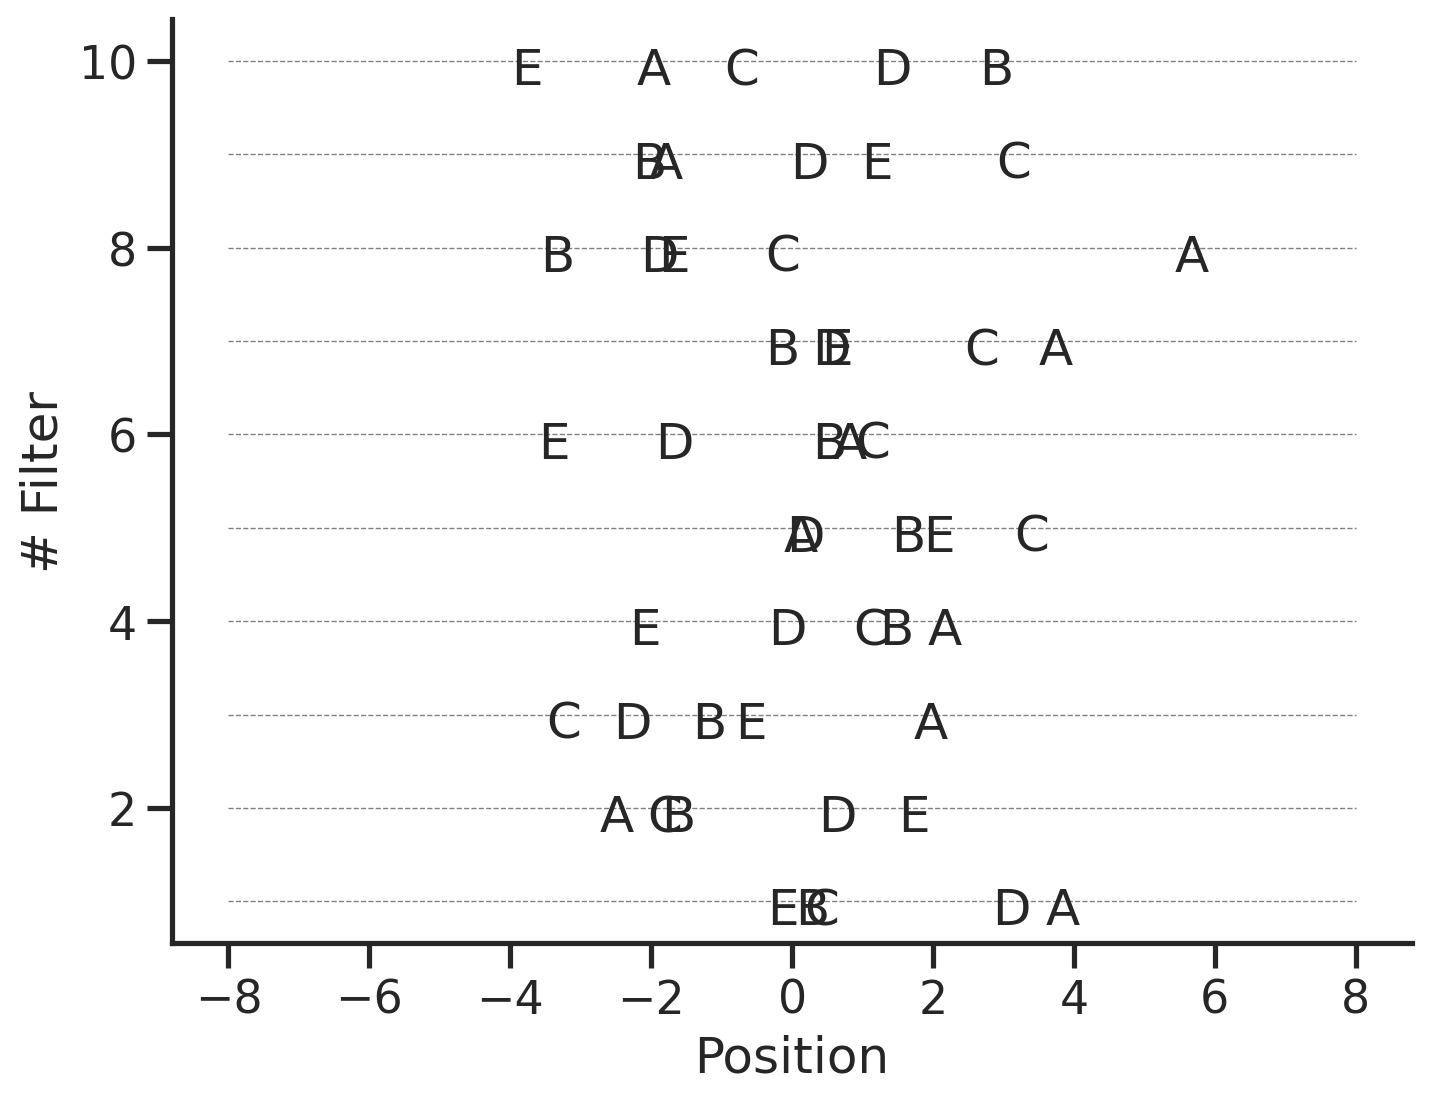

In [5]:
model  = particleFilter(params=params, 
            n_items=n_items, seed=seed)
show_filters(model.filters)    
print(f'weight: {model.weights}')    

weight: [0.001004   0.16007917 0.13073698 0.12500942 0.02718141 0.18442356
 0.02074711 0.18002692 0.16404762 0.00674381]


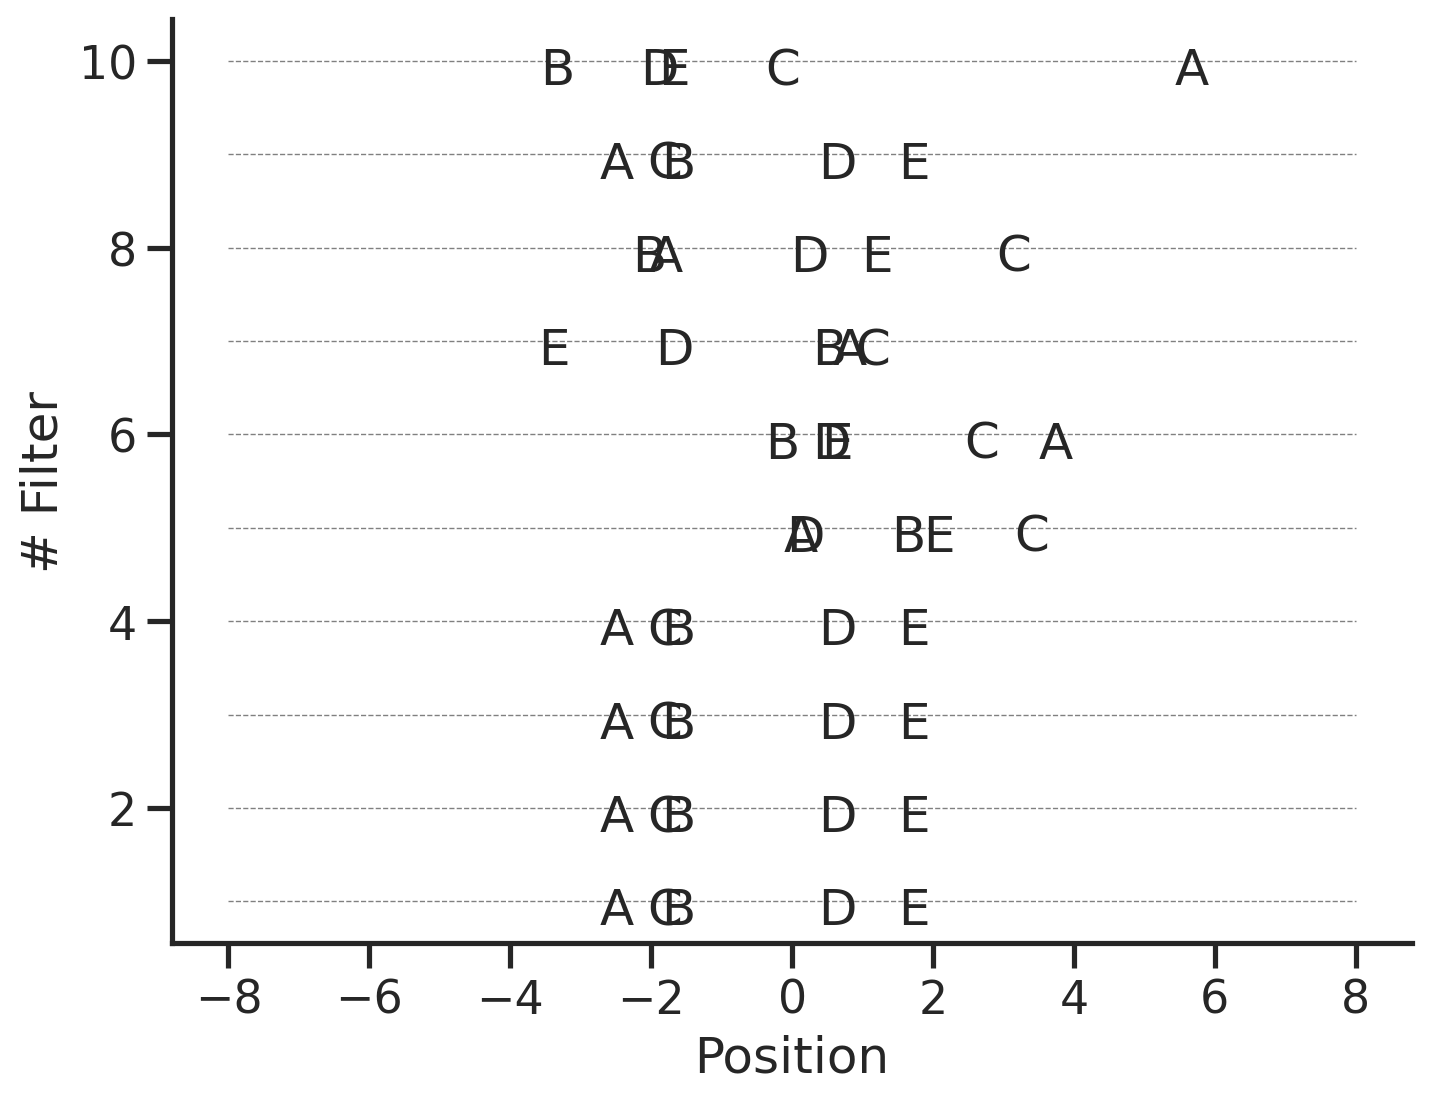

In [6]:
model.reweight(code_input('D < E'))
print(f'weight: {model.weights}')  
model.resampling()
show_filters(model.filters) 

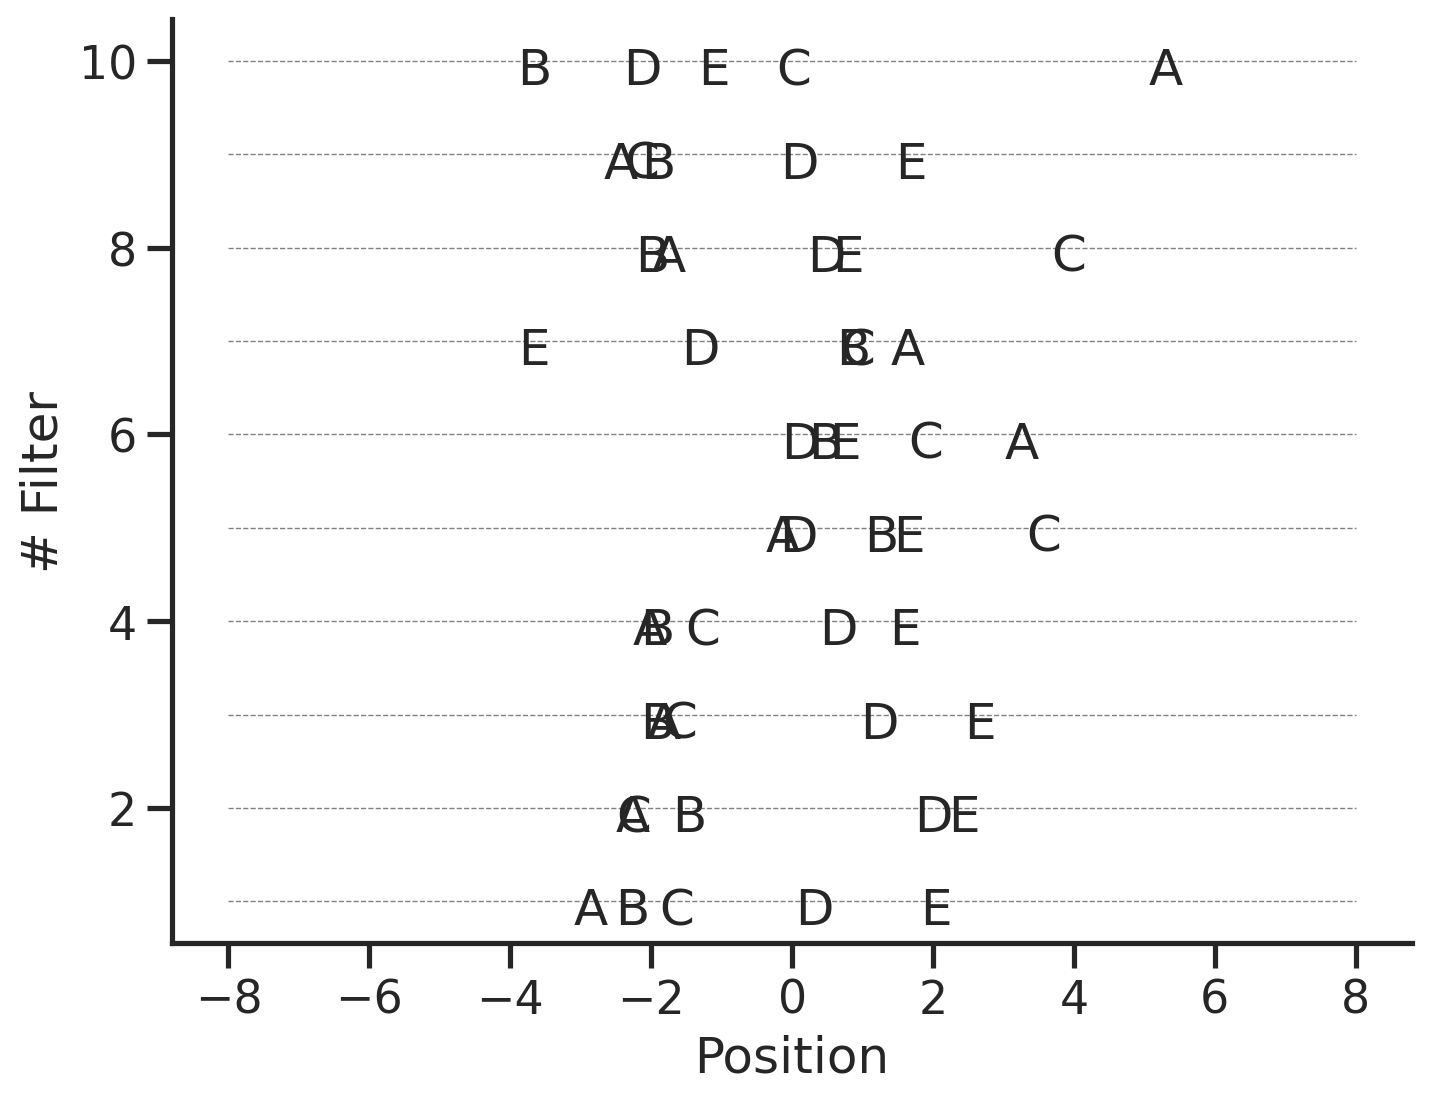

In [7]:
model.propagation()
show_filters(model.filters) 

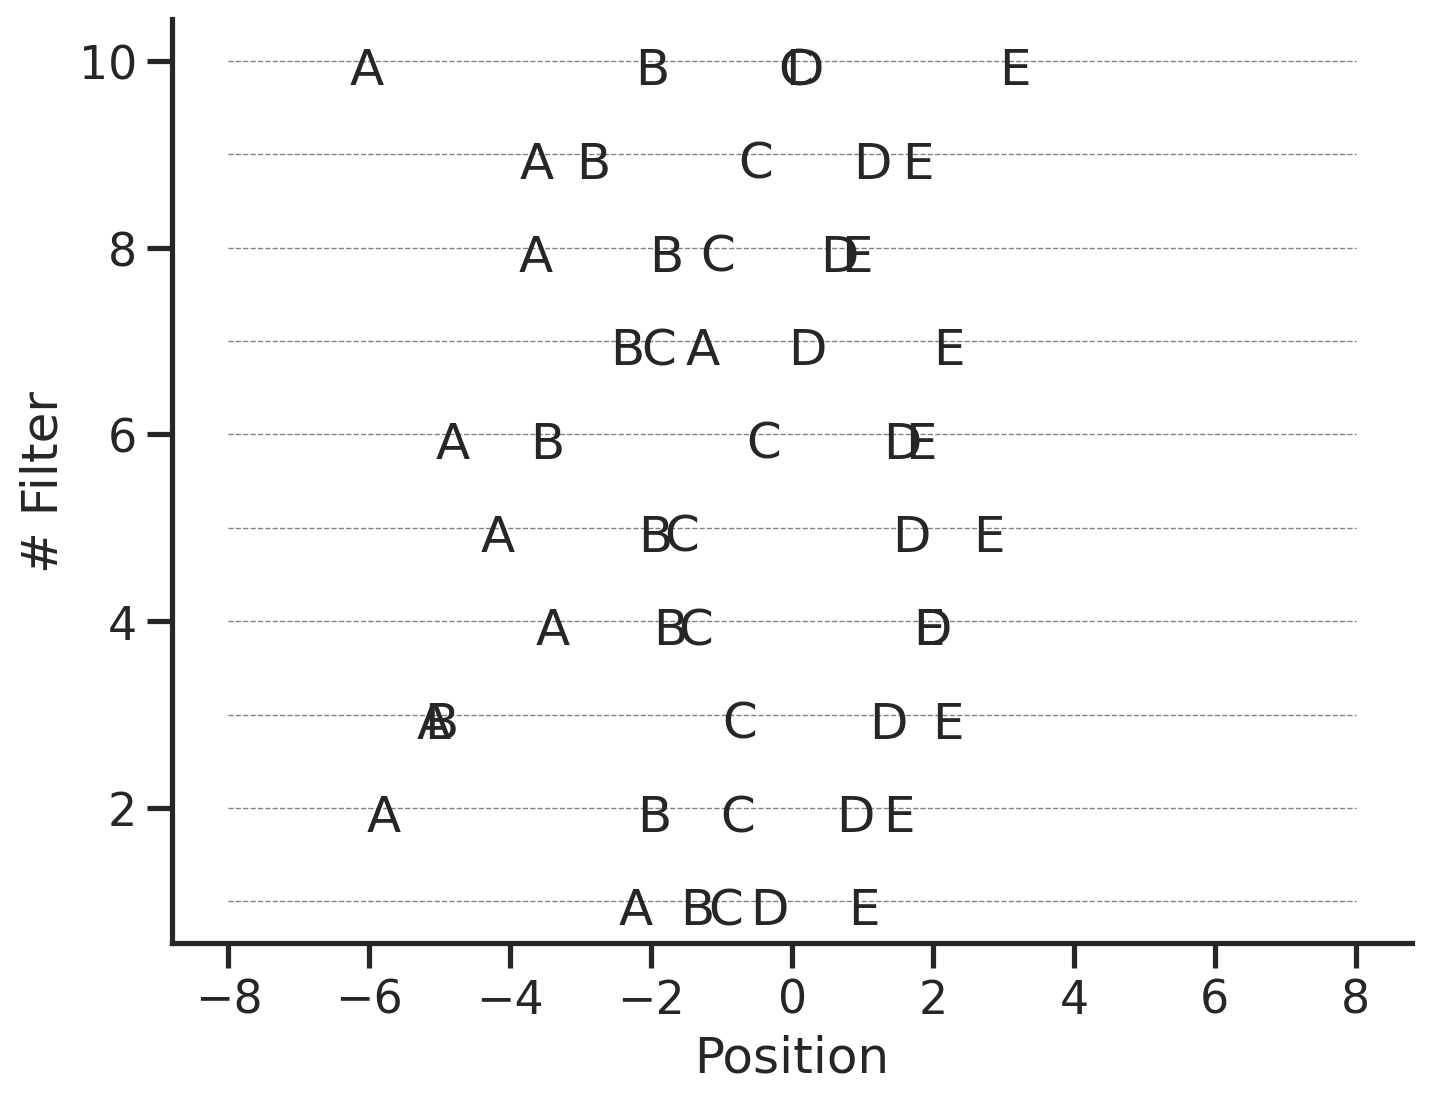

In [10]:
# Chains
tasks = ['A < B', 'B < C', 'C < D', 'D < E', 'D < E', 'C < D', 'B < C', 'A < B',
         'A < B', 'B < C', 'C < D', 'D < E', 'D < E', 'C < D', 'B < C', 'A < B']
model  = particleFilter(params=params, 
                n_items=n_items, seed=seed)
for task in tasks:
    model.step(code_input(task))
    clear_output(True)
    show_filters(model.filters) 
    plt.show()
    sleep(1)

In [12]:
# Jumps
tasks = ['A < B', 'B < C', 'C < D', 'D < E', 'D < E', 'C < D', 'B < C', 'A < B',
         'A < B', 'B < C', 'C < D', 'D < E', 'D < E', 'C < D', 'B < C', 'A < B']
np.random.shuffle(tasks)
print(tasks)

['B < C', 'A < B', 'D < E', 'C < D', 'B < C', 'A < B', 'C < D', 'A < B', 'B < C', 'A < B', 'D < E', 'C < D', 'B < C', 'C < D', 'D < E', 'D < E']


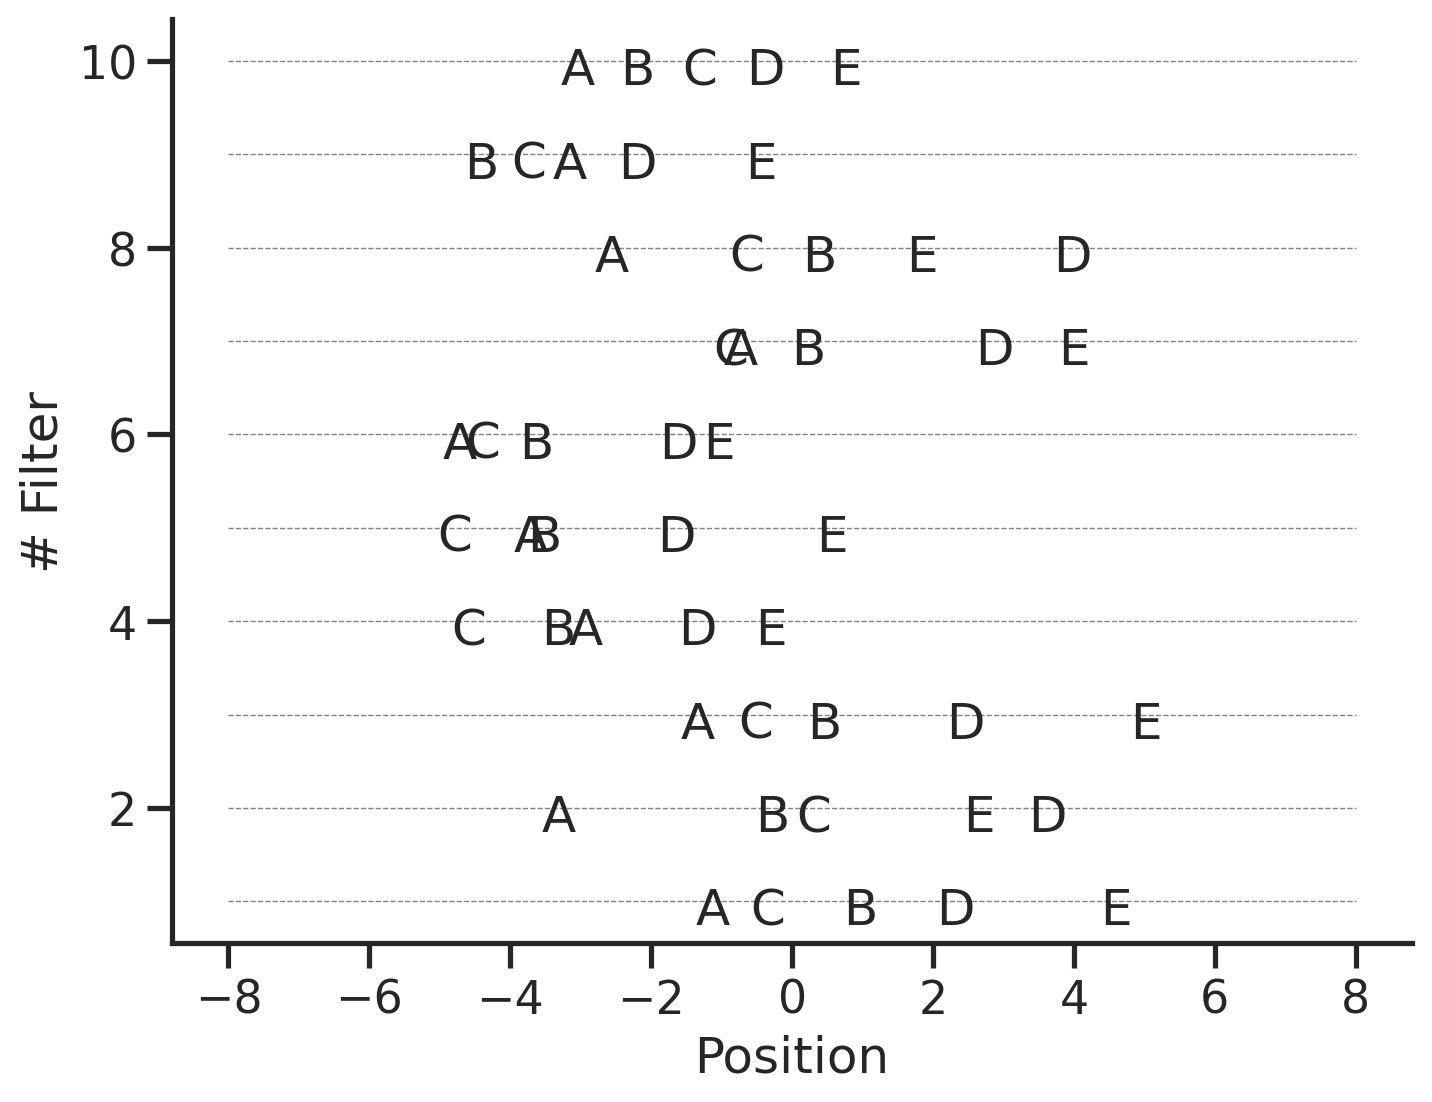

In [13]:
model  = particleFilter(params=params, 
                n_items=n_items, seed=seed)
for task in tasks:
    model.step(code_input(task))
    clear_output(True)
    show_filters(model.filters) 
    plt.show()
    sleep(1)